# Experiment- 1 : Simple Linear regression
Create a Linear Regression model which predicts target variable based on input features after training on given dataset.

Dataset: FuelConsumptionCo2.csv

Objective:
1) Use Scikit Learn
2) Create a model, train it, test it




# Import important libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np


# Get the data



In [3]:
df= pd.read_csv(r'/content/FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data Exploration


Let's see with which features, CO2 Emmisisons varies almost linearly


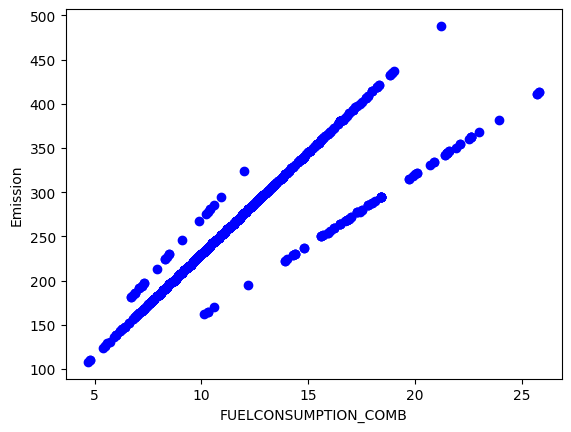

In [ ]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Let's see with engine size



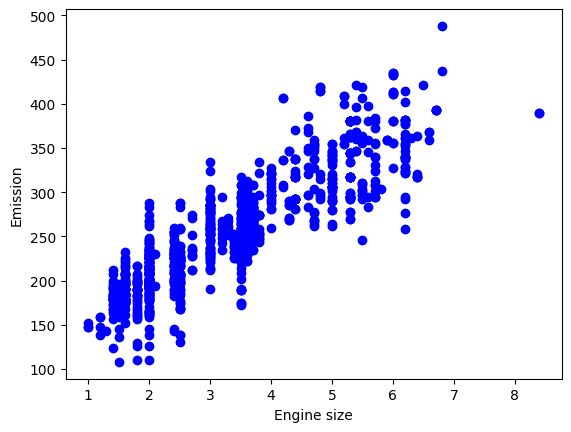

In [ ]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


# Train and Test Split


In [5]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
df_train = train_set.copy()
df_train.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
333,2014,FIAT,500 ABARTH HATCHBACK,MINICOMPACT,1.4,4,M5,X,8.5,6.9,7.8,36,179
106,2014,BMW,650i xDRIVE CABRIOLET,SUBCOMPACT,4.4,8,A8,Z,15.0,9.8,12.7,22,292
585,2014,JEEP,GRAND CHEROKEE 4X4 DIESEL,SUV - STANDARD,3.0,6,A8,D,11.2,8.4,9.9,29,267
55,2014,AUDI,S4,COMPACT,3.0,6,A7,Z,13.2,9.2,11.4,25,262
213,2014,CHEVROLET,EXPRESS 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,X,18.3,14.2,16.5,17,380


#Train a model

Let's fit a model to training data. We will like to see our model predict CO2 emissions given one feature 'Engine Size'


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x_train = df_train[['ENGINESIZE']];
y_train = df_train[['CO2EMISSIONS']];

regr.fit(x_train,y_train);
print('Coefficients: ',regr.intercept_)
print('Intercept: ',regr.coef_)



Coefficients:  [126.28970217]
Intercept:  [[38.99297872]]


Text(0, 0.5, 'Emission')

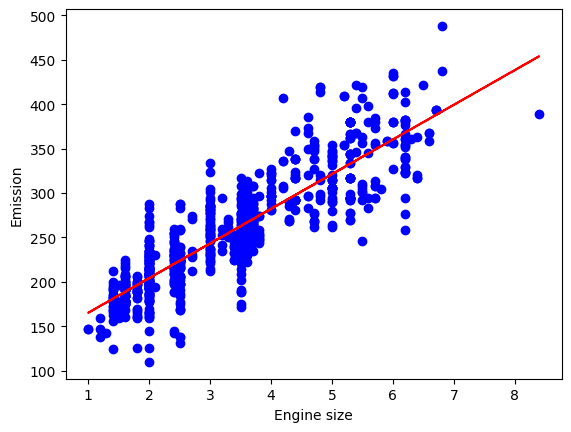

In [ ]:
plt.scatter(df_train.ENGINESIZE, df_train.CO2EMISSIONS,  color='blue')
plt.plot(x_train, regr.coef_[0][0]*x_train + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Evaluation


In [ ]:
from sklearn.metrics import r2_score

df_test = test_set.copy()

x_test = df_test[['ENGINESIZE']];
y_test = df_test[['CO2EMISSIONS']];
y_predict = regr.predict(x_test);


r_square = r2_score(y_test, y_predict)
print(r_square)


0.7615595731934373


#Visualize our predicted values

Let's plot y_test and y_predict




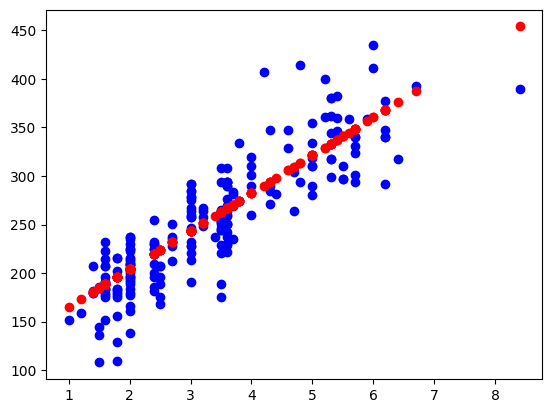

In [ ]:
plt.scatter(x_test,y_test,color='blue')
plt.scatter(x_test,y_predict,color='red')

